Xiyao Xu
05/26


Homework 2

Part1

In [1]:
import math
from scipy.stats import norm
def ab_test(clicks_a, views_a, clicks_b, views_b, alpha=0.05, alternative='one-sided'):
    # 计算汇总样本比例
    p_pooled = (clicks_a + clicks_b) / (views_a + views_b)
    # 计算标准误差
    se = math.sqrt(p_pooled * (1 - p_pooled) * (1/views_a + 1/views_b))
    # 计算Z值
    p_a = clicks_a / views_a
    p_b = clicks_b / views_b
    z = (p_b - p_a) / se
    # 根据alternative参数计算p值
    if alternative == 'one-sided':
        p_value = 1 - norm.cdf(z)
    else:
        p_value = 2 * (1 - norm.cdf(abs(z)))
    # 与显著性水平比较得出结论
    conclusion = "Reject null hypothesis" if p_value < alpha else "Fail to reject null hypothesis"
    return z, p_value, conclusion
# 原始数据
clicks_a, views_a = 500, 1000
clicks_b, views_b = 550, 1000

In [2]:
# 在5%和1%的显著性水平下进行检验
for alpha in [0.05, 0.01]:
    z, p_value, conclusion = ab_test(clicks_a, views_a, clicks_b, views_b, alpha)
    print(f"Alpha = {alpha}")
    print(f"Z-value: {z:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Conclusion: {conclusion}\n")

Alpha = 0.05
Z-value: 2.2389
P-value: 0.0126
Conclusion: Reject null hypothesis

Alpha = 0.01
Z-value: 2.2389
P-value: 0.0126
Conclusion: Fail to reject null hypothesis



In [3]:
# 调整Logo B的点击量以观察结果变化
for clicks_b in [560, 570]:
    print(f"If Logo B clicks = {clicks_b}:")
    z, p_value, conclusion = ab_test(clicks_a, views_a, clicks_b, views_b)
    print(f"Z-value: {z:.4f}")
    print(f"P-value: {p_value:.4f}\n")

If Logo B clicks = 560:
Z-value: 2.6881
P-value: 0.0036

If Logo B clicks = 570:
Z-value: 3.1382
P-value: 0.0008



If the number of clicks for logo B is increased to 560 or 570 times, we would expect the p-value to decrease compared to the original scenario. A smaller p-value suggests a more significant difference in the conversion rates between logo A and logo B, potentially leading to the rejection of the null hypothesis.

part 2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Task 1

In [5]:
# Task 1: Import the data
df1 = pd.read_csv('realEstate1.csv')
df2 = pd.read_csv('realEstate2.csv')
df = pd.concat([df1, df2], ignore_index=True)

This code imports the necessary libraries and reads two CSV files containing real estate data. The data from these files are concatenated into a single DataFrame for further analysis.

Task 2

In [6]:
# Task 2: Clean the data
df = df[(df['LstPrice'] >= 200000) & (df['LstPrice'] <= 1000000)]
columns_to_keep = ['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
df = df[columns_to_keep]
df['TotSqf'] = df['TotSqf'].str.replace(',', '').astype(int)
df['Prop_Type_num'] = pd.factorize(df['PropType'])[0]
df = df[(df['Longitude'] != 0) & (df['Taxes'] < 20000)]

This code filters the dataset to include only houses with a list price between $200,000 and $1,000,000. It retains only the relevant columns for analysis, converts the TotSqf column to integers, creates a numerical column for property types, and removes rows with erroneous longitude and tax values.

Task 3

Dataset Description:
            Acres        Deck    GaragCap    Latitude   Longitude  \
count  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     0.130615    0.742308    1.273077   40.777502 -111.875672   
std      0.123752    1.242327    0.973811    0.005816    0.013993   
min      0.000000    0.000000    0.000000   40.769424 -111.913645   
25%      0.047500    0.000000    0.000000   40.772445 -111.886563   
50%      0.110000    1.000000    1.000000   40.775731 -111.874067   
75%      0.160000    1.000000    2.000000   40.782035 -111.865986   
max      0.690000   16.000000    5.000000   40.791059 -111.843083   

             LstPrice       Patio    PkgSpacs      SoldPrice        Taxes  \
count      260.000000  260.000000  260.000000     260.000000   260.000000   
mean    463442.165385    0.834615    1.038462  450714.384615  3029.373077   
std     200326.159745    3.379411    1.581280  190064.385847  1684.241154   
min     200000.000000    0.000000    0.000000  19

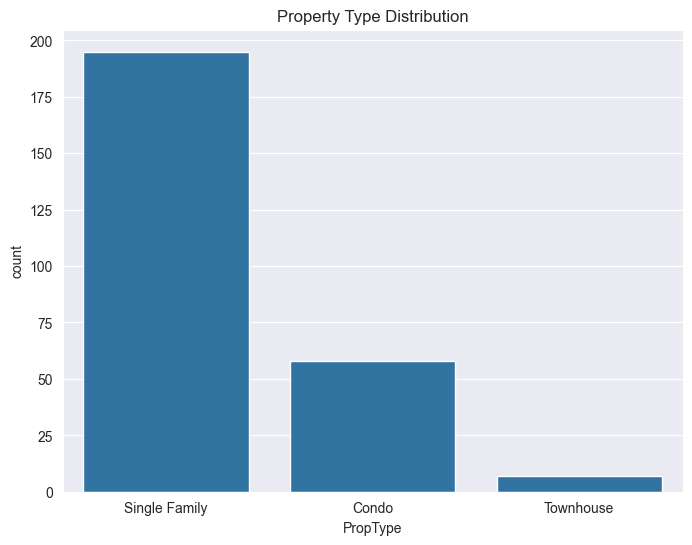

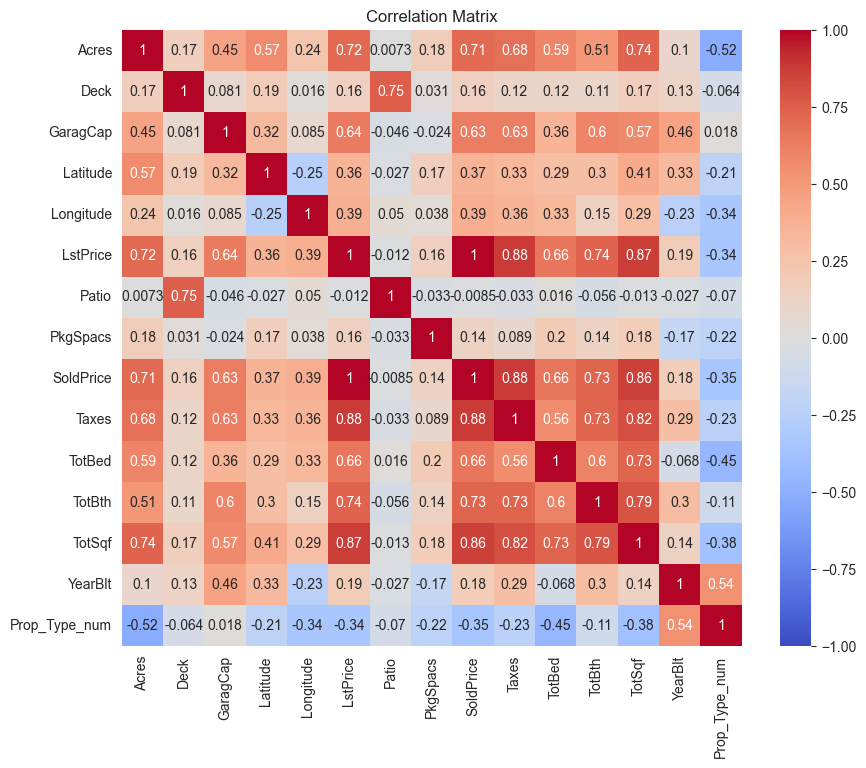

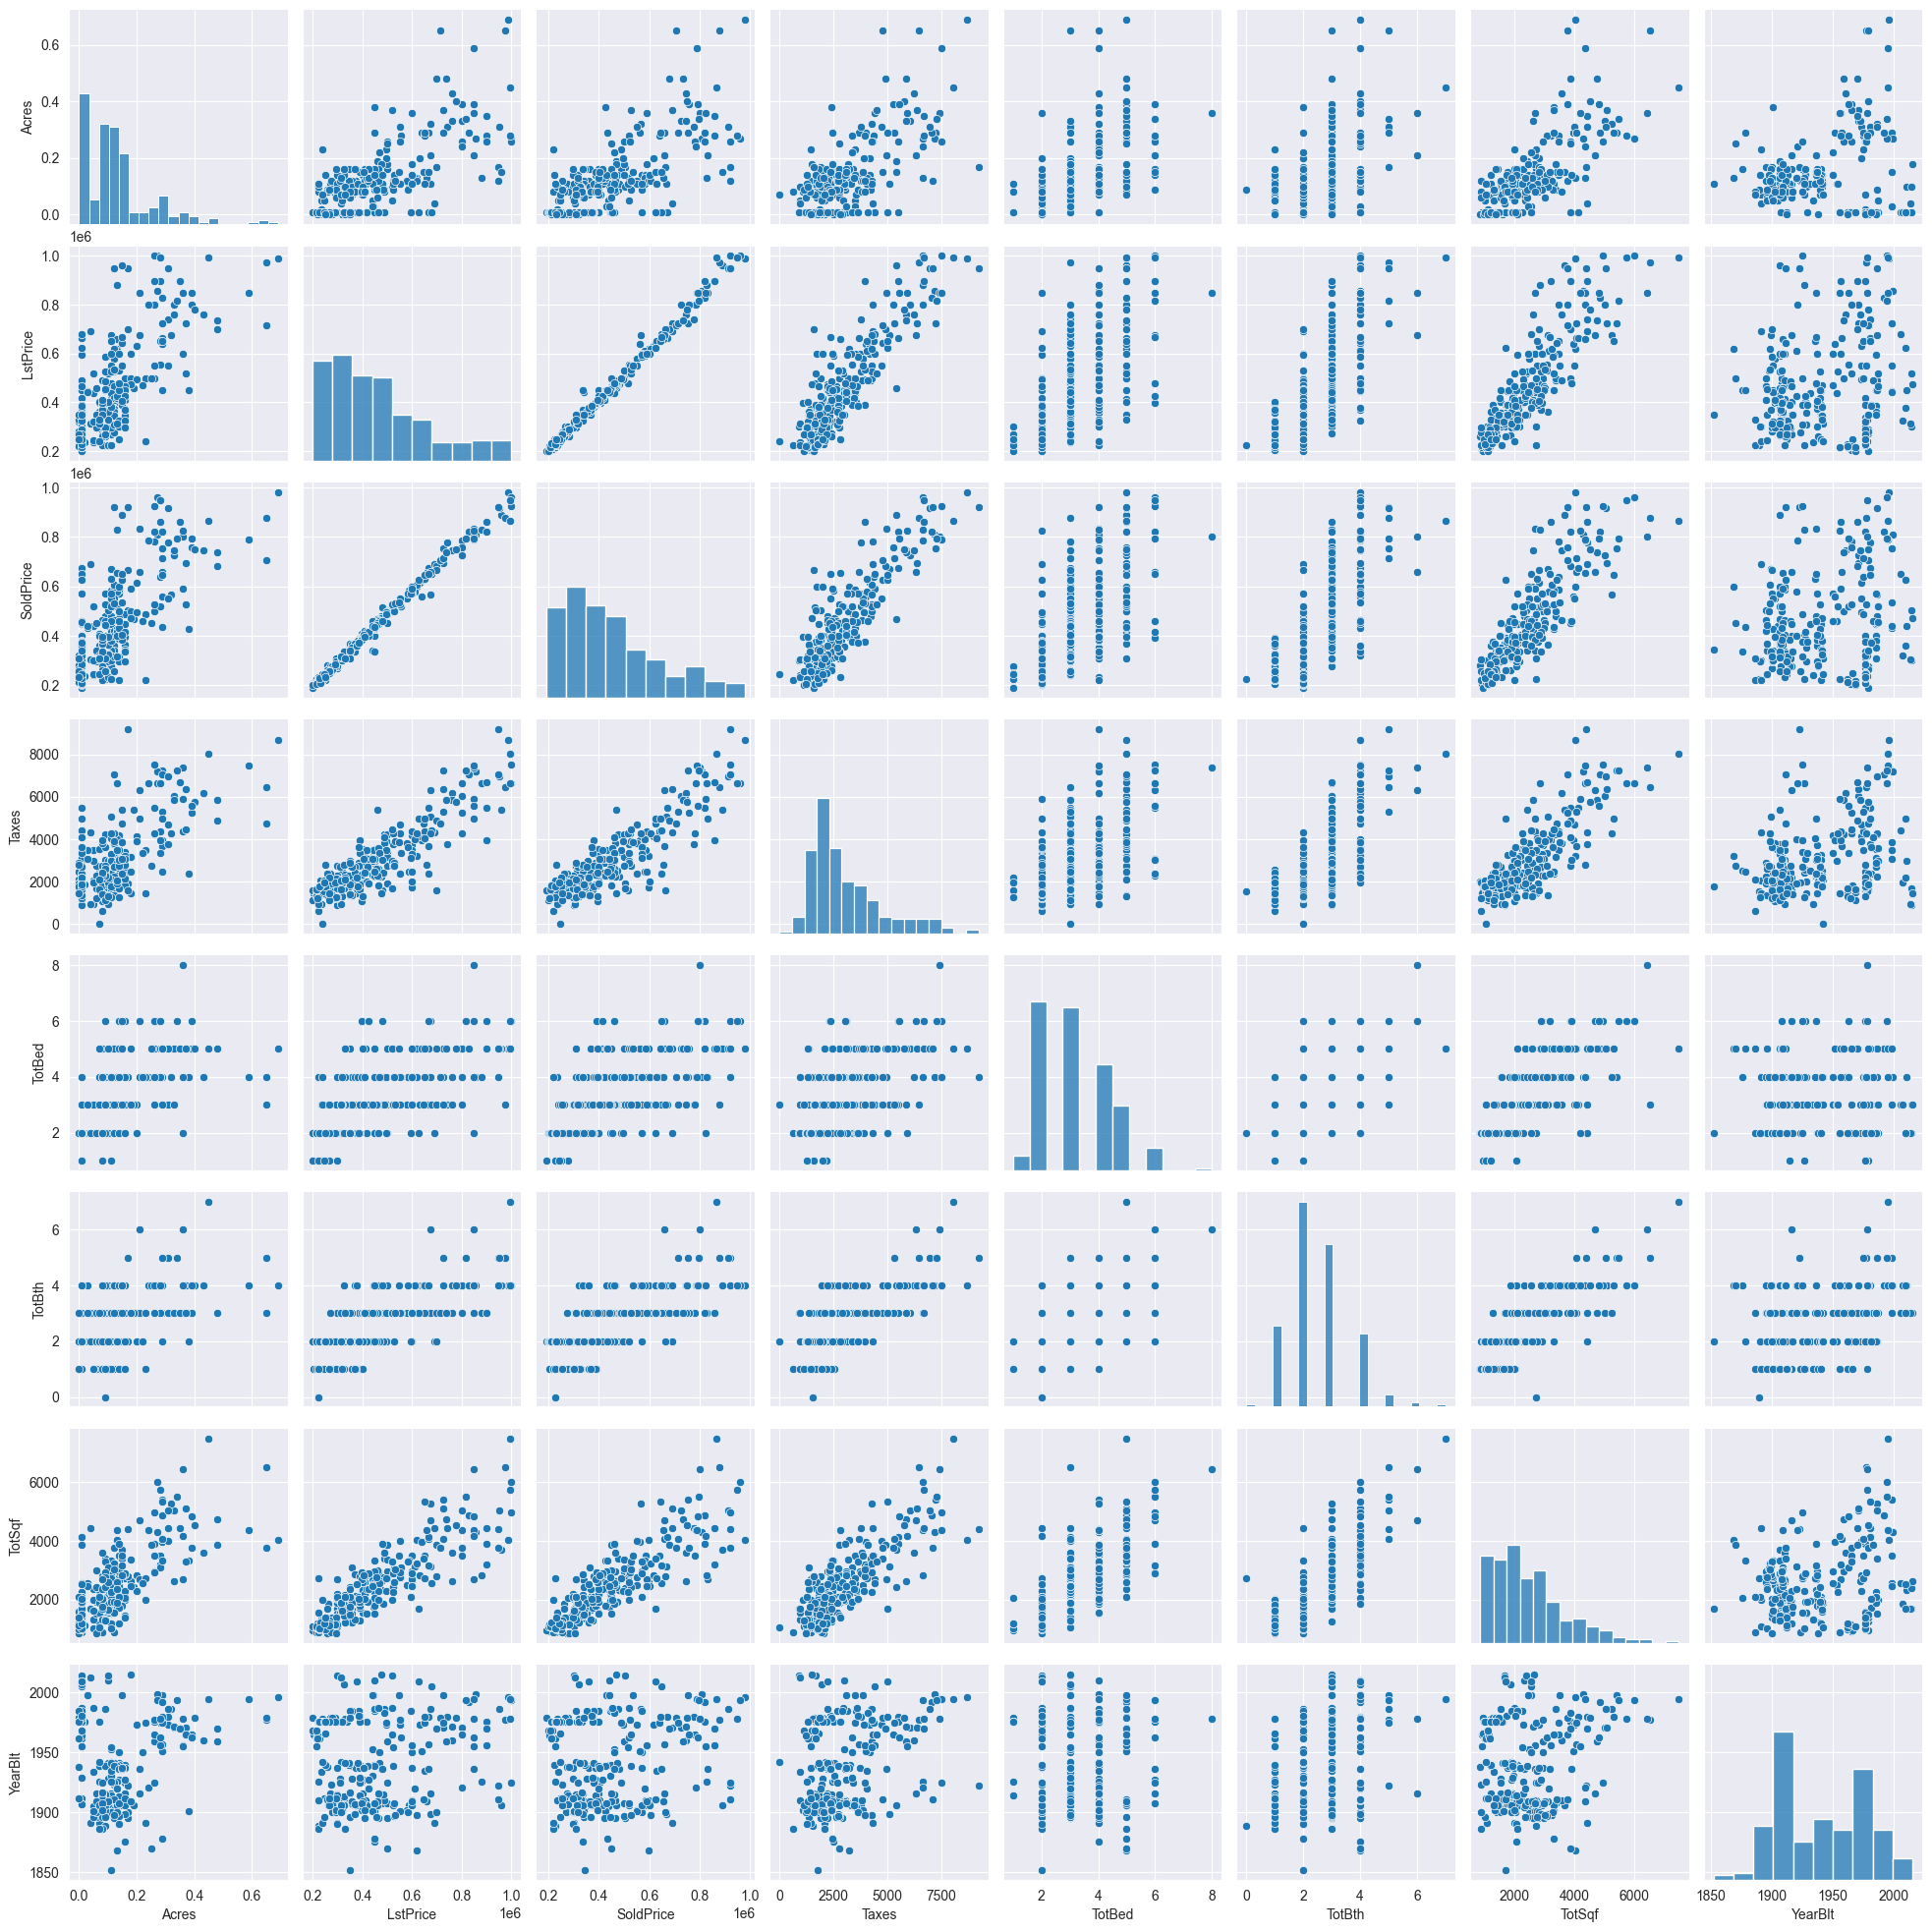

In [7]:
# Task 3: Exploratory data analysis
print("Dataset Description:")
print(df.describe())

plt.figure(figsize=(8, 6))
sns.countplot(x='PropType', data=df)
plt.title('Property Type Distribution')
plt.show()

# Exclude non-numeric columns when computing the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

columns_for_scatter = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']
sns.pairplot(df[columns_for_scatter])
plt.show()

This code performs exploratory data analysis by printing a statistical summary of the dataset, creating a bar chart to show the distribution of property types, generating a heatmap of the correlation matrix, and producing a scatter plot matrix to visualize the relationships between selected variables.

Task 4

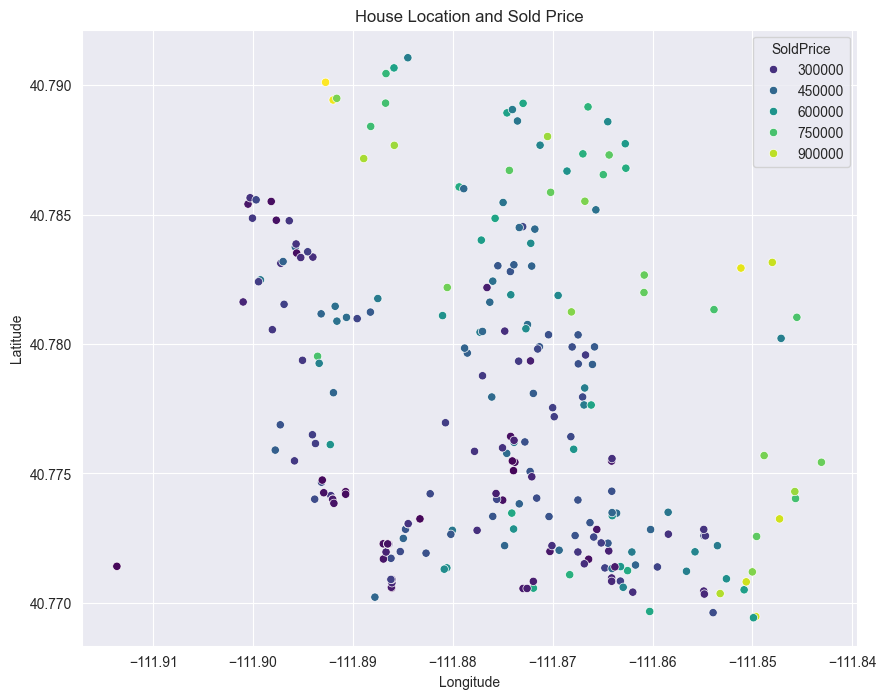

In [8]:
# Task 4: Geospatial plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='SoldPrice', data=df, palette='viridis')
plt.title('House Location and Sold Price')
plt.show()

This code creates a scatter plot to visualize the geographical distribution of houses based on their latitude and longitude, with the color indicating the sold price. This helps in understanding the relationship between house location and price.

Task 5

Simple Linear Regression Results:
R-squared: 0.9902162207231955
Coefficient (beta_1): 0.9441219595017859


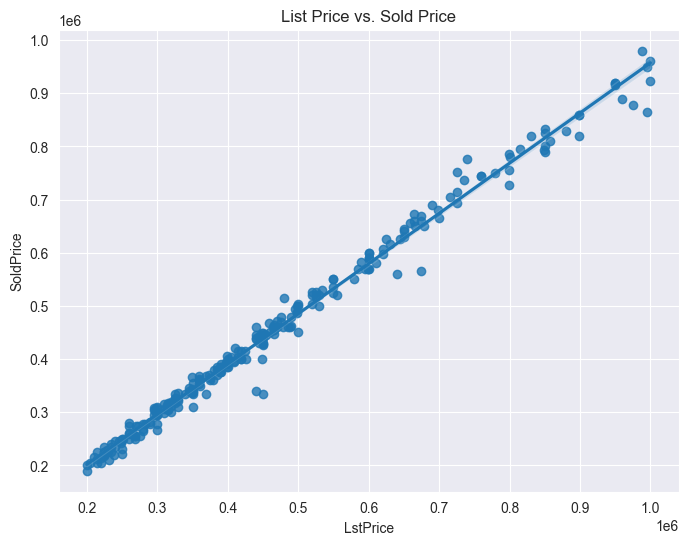

In [9]:
# Task 5: Simple Linear Regression
X = df[['LstPrice']]
y = df['SoldPrice']
model = LinearRegression()
model.fit(X, y)
print("Simple Linear Regression Results:")
print("R-squared:", model.score(X, y))
print("Coefficient (beta_1):", model.coef_[0])

plt.figure(figsize=(8, 6))
sns.regplot(x='LstPrice', y='SoldPrice', data=df)
plt.title('List Price vs. Sold Price')
plt.show()

This code performs simple linear regression to model the relationship between list price and sold price. It prints the R-squared value and the regression coefficient, and plots a regression line to visualize the fit.

Task 6

In [10]:
# Task 6: Multilinear Regression
features = ['TotSqf', 'GaragCap', 'Latitude', 'Longitude']
X = df[features]
y = df['SoldPrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("Multilinear Regression Results:")
print(model.summary())

Multilinear Regression Results:
                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     254.5
Date:                Tue, 28 May 2024   Prob (F-statistic):           9.50e-88
Time:                        17:08:03   Log-Likelihood:                -3319.7
No. Observations:                 260   AIC:                             6649.
Df Residuals:                     255   BIC:                             6667.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.009e+0

This code performs multilinear regression using multiple predictors (total square footage, garage capacity, latitude, and longitude) to model the sold price. It prints a detailed summary of the regression results, including coefficients and statistical significance

Task 7

Model 1 Results:
                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     35.61
Date:                Tue, 28 May 2024   Prob (F-statistic):           7.94e-09
Time:                        17:08:03   Log-Likelihood:                -3511.9
No. Observations:                 260   AIC:                             7028.
Df Residuals:                     258   BIC:                             7035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.87e+05   1.

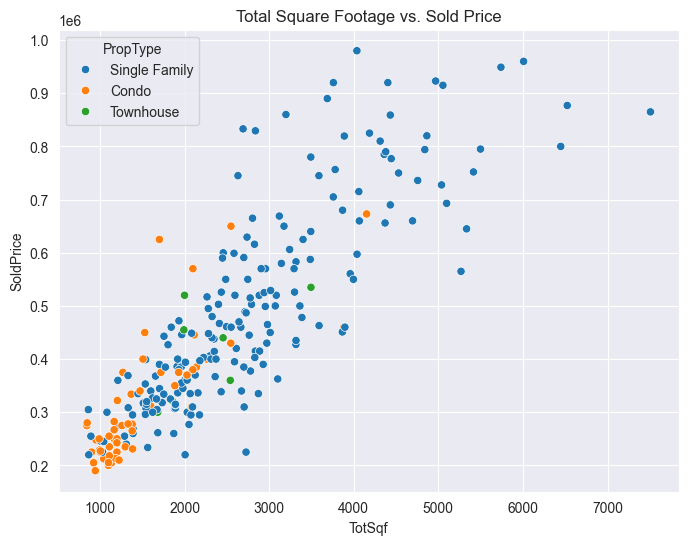

In [11]:
# Task 7: Incorporating a categorical variable
model1 = sm.OLS(df['SoldPrice'], sm.add_constant(df['Prop_Type_num'])).fit()
print("Model 1 Results:")
print(model1.summary())

model2 = sm.OLS(df['SoldPrice'], sm.add_constant(df[['Prop_Type_num', 'TotSqf']])).fit()
print("Model 2 Results:")
print(model2.summary())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotSqf', y='SoldPrice', hue='PropType', data=df)
plt.title('Total Square Footage vs. Sold Price')
plt.show()

This code performs two regression analyses: one using property type as a predictor and another using both property type and total square footage. It compares the results to understand the impact of property type on sold price. Additionally, it creates a scatter plot to visualize the relationship between total square footage and sold price, colored by property type.